<a href="https://colab.research.google.com/github/mratanusarkar/Web-Scraping-tickertapeIN/blob/main/Notebooks/scraping_tickertapeIN_etfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping etf data from tickertape.in

**Input**: etf name in "https://www.tickertape.in/etfs/{etf-name}" <br>
**Output**: full etf data & predictions from tickertape in JSON/Py Dictionary format


## Import Packages

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

import json
import time
import datetime as dt

import matplotlib.pyplot as plt
import plotly.express as px

## Request and Fetch the Webpage

Let's try with a sample etf name, say "NIFTYBEES"

In [2]:
# enter etf subdirectory
subdir = "nippon-india-nifty-50-bees-etf-NBES"
# subdir = "nippon-india-silver-etf-NETFS"

In [3]:
# hit "https://www.tickertape.in/etfs/nippon-india-nifty-50-bees-etf-NBES"
requests.get("https://www.tickertape.in/etfs/" + subdir)

<Response [200]>

In [4]:
# wow! no restriction for bots! no need of any headers!
response = requests.get("https://www.tickertape.in/etfs/" + subdir)
response.text[0:500]

'<!DOCTYPE html><html lang="en-US"><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="shortcut icon" href="/favicon/favicon.png"/><link rel="apple-touch-icon" href="/favicon/favicon-192x192.png"/><link rel="manifest" href="/manifest/manifest.json"/><style type="text/css">:root {--white: #ffffff; --font_primary: #535B62; --font_dark: #2f363f; --font_light: #81878c; --font_blue: #0088ea; --font_lighter: #a2a8ae; --brand_primary: #151e28; --brand_success: #28c39a; --brand_danger:'

In [5]:
# not required for this webpage, use if bot restrictions are added in future.

# google chrome browser's request header (to make it look like, we are making this request from a browser)
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"
}

# hit using the header
response = requests.get("https://www.tickertape.in/etfs/" + subdir, headers=header)
response.text[0:500]

'<!DOCTYPE html><html lang="en-US"><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="shortcut icon" href="/favicon/favicon.png"/><link rel="apple-touch-icon" href="/favicon/favicon-192x192.png"/><link rel="manifest" href="/manifest/manifest.json"/><style type="text/css">:root {--white: #ffffff; --font_primary: #535B62; --font_dark: #2f363f; --font_light: #81878c; --font_blue: #0088ea; --font_lighter: #a2a8ae; --brand_primary: #151e28; --brand_success: #28c39a; --brand_danger:'

## Pass the fetched webpage response to Beautiful Soup

In [6]:
# give the webpage to Beautiful Soup using parsers: "html.parser" or "lxml"
soup = BeautifulSoup(response.text, 'lxml')

## Let us try and extract some data from the soup

- we see the whole webpage and how the html dom structure is made
- on inspecting, we see that all our required info is mostly inside div blocks with unique class names
- few are inside span or h tags, but all blocks has classes
- Let us extract few important html dom blocks and see

### [1] Basic ETF Information

In [7]:
# etf name
htmlBlock = soup.find("h3", class_="security-name")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<h3 class="jsx-2903438179 security-name">
 Nippon India Nifty 50 Bees ETF
</h3>
Nippon India Nifty 50 Bees ETF


In [8]:
# ticker name
htmlBlock = soup.find("span", class_="ticker")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<span class="jsx-2903438179 ticker text-teritiary font-medium">
 NIFTYBEES
</span>

NIFTYBEES


In [9]:
# type
print("etfs")

etfs


In [10]:
# tracking
htmlBlock = soup.find("p", class_="mb12")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<p class="text-12 desktop--only mb12 text-12">
 Tracking
 <!-- -->
 <a class="typography-body-medium-xs pointer text-blue text-uppercase" href="https://www.tickertape.in/indices/nifty-index-.NSEI" rel="noreferrer noopener" target="_blank" title="Nifty Index">
  Nifty Index
 </a>
</p>

Tracking Nifty Index


In [11]:
# current price
htmlBlock = soup.find("span", class_="current-price")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<span class="jsx-3168773259 current-price typography-h1 text-primary">
 186.23
</span>

186.23


In [12]:
# marketcap, sector and risk
htmlBlock = soup.find("div", class_="stock-labels")
htmlBlock = htmlBlock.find_all("span", class_="stock-label-title")
for block in htmlBlock:
    print(block)

value = htmlBlock[0].text if htmlBlock[0] is not None else None
print(value)

value = htmlBlock[1].text if htmlBlock[1] is not None else None
print(value)

value = htmlBlock[2].text if htmlBlock[2] is not None else None
print(value)

<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">ETF</span>
<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">Large Cap</span>
<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">High Liquidity</span>
ETF
Large Cap
High Liquidity


In [13]:
# profile

htmlBlock = soup.find("div", class_="amc-profile")
# print(htmlBlock.prettify())

print(htmlBlock.h2.text)
print(htmlBlock.p.text)

value_h = htmlBlock.h2.text if htmlBlock.h2 is not None else ""
value_p = htmlBlock.p.text if htmlBlock.p is not None else ""
value = value_h + ": " + value_p if (value_h + value_p) != "" else None
print(value)

AMC profile
Reliance Nippon Life Asset Management or RNAM is one of India’s two largest asset management companies. Currently, it has over $60 billion in its corpus. It is a wholly owned subsidiary of the Reliance Anil Dhirubhai Ambani or ADA Group.
AMC profile: Reliance Nippon Life Asset Management or RNAM is one of India’s two largest asset management companies. Currently, it has over $60 billion in its corpus. It is a wholly owned subsidiary of the Reliance Anil Dhirubhai Ambani or ADA Group.


### [2] Overview

In [14]:
# current price
htmlBlock = soup.find("span", class_="current-price")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<span class="jsx-3168773259 current-price typography-h1 text-primary">
 186.23
</span>

186.23


In [15]:
# change absolute-value
htmlBlock = soup.find("span", class_="absolute-value")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<span class="jsx-3168773259 change absolute-value text-14 typography-body-medium-l down">
 <i class="jsx-3168773259 icon-Red-down">
 </i>
 1.75
 <!-- -->
 %
</span>

1.75%


In [16]:
# change percentage-value
htmlBlock = soup.find("span", class_="percentage-value")
print(htmlBlock.prettify())

value = str(htmlBlock.text).replace("(", "").replace(")", "").strip() if htmlBlock is not None else None
print(value)

<span class="jsx-3168773259 change percentage-value text-14 down">
 (
 <!-- -->
 -
 <!-- -->
 3.31
 <!-- -->
 )
</span>
-3.31


In [17]:
# tracking
htmlBlock = soup.find("p", class_="mb12")
print(htmlBlock.prettify())

value = htmlBlock.text if htmlBlock is not None else None
print(value)

<p class="text-12 desktop--only mb12 text-12">
 Tracking
 <!-- -->
 <a class="typography-body-medium-xs pointer text-blue text-uppercase" href="https://www.tickertape.in/indices/nifty-index-.NSEI" rel="noreferrer noopener" target="_blank" title="Nifty Index">
  Nifty Index
 </a>
</p>

Tracking Nifty Index


In [18]:
# day high, low, returns
htmlBlock = soup.find("div", class_="statbox")
print(htmlBlock.prettify())

# value = htmlBlock.text if htmlBlock is not None else None
# print(value)

# NOT POSSIBLE, DYNAMICALLY CALCULATED AFTER PAGE LOAD!!!!

<div class="jsx-1785027547 statbox ">
 <div class="jsx-3420801268">
  <div class="jsx-3420801268 typography-body-regular-m text-secondary ">
   High
  </div>
  <div class="jsx-3420801268 value typography-body-medium-l text-primary ">
   —
  </div>
 </div>
 <div class="jsx-3420801268">
  <div class="jsx-3420801268 typography-body-regular-m text-secondary ">
   Low
  </div>
  <div class="jsx-3420801268 value typography-body-medium-l text-primary ">
   —
  </div>
 </div>
 <div class="jsx-3420801268">
  <div class="jsx-3420801268 typography-body-regular-m text-secondary ">
   Returns
  </div>
  <div class="jsx-3420801268 value typography-body-medium-l text-primary ">
   —
  </div>
 </div>
</div>


In [19]:
# we can get the full price data from this url:

# for day chart:
# "https://api.tickertape.in/stocks/charts/intra/{some-internal-code-name}"

# for other durations:
# "https://api.tickertape.in/stocks/charts/inter/{some-internal-code-name}?duration={Duration}"
# dutations: "1w" for week, "1mo" for month, "1y" for 1year, "5y" for 5year, "max" for full

# for SIP:
# https://api.tickertape.in/stocks/charts/sip/{some-internal-code-name}

# Example: "https://api.tickertape.in/stocks/charts/inter/NBES?duration=1w"

## NEED INVESTIGATION ON HOW TO EXTRACT THE CODE NAMES
## (Found: it's the last keyword in caps at the end of the url)

In [20]:
chartData = requests.get("https://api.tickertape.in/stocks/charts/inter/NBES?duration=1w")
chartData.text

'{"success":true,"data":[{"points":[{"lp":191.62,"v":207033,"ts":"2022-04-11T03:49:00.000Z"},{"lp":191.36,"v":327401,"ts":"2022-04-11T03:54:00.000Z"},{"lp":191.28,"v":439119,"ts":"2022-04-11T03:59:00.000Z"},{"lp":191.4,"v":516523,"ts":"2022-04-11T04:04:00.000Z"},{"lp":191.45,"v":561202,"ts":"2022-04-11T04:09:00.000Z"},{"lp":191.11,"v":732095,"ts":"2022-04-11T04:14:00.000Z"},{"lp":191.17,"v":761637,"ts":"2022-04-11T04:19:00.000Z"},{"lp":191.28,"v":811203,"ts":"2022-04-11T04:24:00.000Z"},{"lp":191.49,"v":847923,"ts":"2022-04-11T04:29:00.000Z"},{"lp":191.43,"v":893493,"ts":"2022-04-11T04:34:00.000Z"},{"lp":191.63,"v":914914,"ts":"2022-04-11T04:39:00.000Z"},{"lp":191.62,"v":964588,"ts":"2022-04-11T04:44:00.000Z"},{"lp":191.65,"v":1021729,"ts":"2022-04-11T04:49:00.000Z"},{"lp":191.64,"v":1035659,"ts":"2022-04-11T04:54:00.000Z"},{"lp":191.75,"v":1058755,"ts":"2022-04-11T04:59:00.000Z"},{"lp":191.54,"v":1086648,"ts":"2022-04-11T05:04:00.000Z"},{"lp":191.56,"v":1109422,"ts":"2022-04-11T05:09:0

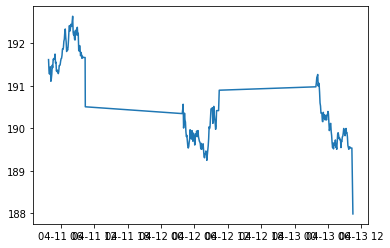

In [21]:
# chartData.json()['data'][0]['points'][0]['lp']
x = [dt.datetime.strptime(data['ts'],'%Y-%m-%dT%H:%M:%S.%fZ') for data in chartData.json()['data'][0]['points']]
y = [data['lp'] for data in chartData.json()['data'][0]['points']]

plt.plot(x, y)
plt.show()

In [22]:
rawData = pd.DataFrame(chartData.json()['data'][0]['points'])
rawData['ts']= pd.to_datetime(rawData['ts'])
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   lp      236 non-null    float64            
 1   v       236 non-null    int64              
 2   ts      236 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 5.7 KB


In [23]:
fig = px.line(rawData, x='ts', y="lp")
fig.show()

In [24]:
# TO BE CONTINUED (in other notebook) . . .

In [25]:
# marketcap, sector and risk
htmlBlock = soup.find("div", class_="stock-labels")
titles = htmlBlock.find_all("span", class_="stock-label-title")
descs = htmlBlock.find_all("span", class_="stock-label-desc")
for title in titles:
    print(title)
for desc in descs:
    print(desc)

value = titles[0].text if titles[0] is not None else None
print(value)
value = descs[0].text if descs[0] is not None else None
print(value)

value = titles[1].text if titles[1] is not None else None
print(value)
value = descs[1].text if descs[1] is not None else None
print(value)

value = titles[2].text if titles[2] is not None else None
print(value)
value = descs[2].text if descs[2] is not None else None
print(value)


<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">ETF</span>
<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">Large Cap</span>
<span class="jsx-1903139372 stock-label-title typography-body-medium-xs">High Liquidity</span>
<span class="jsx-1903139372 stock-label-desc typography-body-regular-m desktop--only">Equity</span>
<span class="jsx-1903139372 stock-label-desc typography-body-regular-m desktop--only"></span>
<span class="jsx-1903139372 stock-label-desc typography-body-regular-m desktop--only">Average daily traded value of the ETF is high</span>
ETF
Equity
Large Cap

High Liquidity
Average daily traded value of the ETF is high


### [3] Investment Checklist

In [26]:
# checklist-item carousel-item
htmlBlock = soup.find("div", class_="inv-chk-root")
# print(htmlBlock.prettify())

htmlBlock.find_all("div", class_="commentary-item-root")

[<div class="jsx-2732034756 jsx-482152645 commentary-item-root d-flex-row align-start justify-start " eventlabel="Clicked Checklist Item"><i class="jsx-2732034756 jsx-482152645 icon-mood icon-positive-comment text-24 mr12"></i><div class="jsx-2732034756 jsx-482152645 content"><h4 class="jsx-2732034756 jsx-482152645 typography-body-medium-m text-primary"><span class="jsx-2732034756 jsx-482152645 relative no-select tooltip-holder">NAV<div class="jsx-1503855875 tooltip-root sh-tooltip font-regular">The net asset value (NAV) of an ETF is based on the current prices of the stocks/assets in the fund and an actual accounting of the total cash in the fund at the time of calculation. Market price can be different from real time NAV due to late market activity and both tend to converge periodically. A market price close to real time NAV is much better for investment!</div></span></h4><p class="jsx-2732034756 jsx-482152645 lh-138 text-13 text-secondary typography-body-regular-m commentary-desc">C

In [27]:
htmlBlock = soup.find("div", class_="inv-chk-root")
htmlBlock = htmlBlock.find_all("div", class_="commentary-item-root")

# get all keys and values
for item in htmlBlock:
    key = item.find("span", class_="tooltip-holder").contents[0]
    key = key.title().replace(" ", "")
    key = key[0].lower() + key[1:]
    value = item.find("i")['class'][3].split("-")[1]

    print(key, "     \t:", value)

nav      	: positive
expenseRatio      	: positive
trackingError      	: positive
returnVsFdRates      	: positive
entryPoint      	: positive


### [4] Key Metrics

In [28]:
# ratios-card - PERatio, PBRatio, DividendYield, SectorPE, SectorPB, SectorDividendYield

htmlBlock = soup.find("div", class_="ratios-card")
# print(htmlBlock.prettify())

keys = htmlBlock.select("span.ellipsis.desktop--only")
values = htmlBlock.find_all("div", class_="value")

for i in range(len(keys)):
    key = keys[i].text
    key = key.replace(" ", "")
    value = values[i].text
    value = None if str(value) == "—" else str(value)
    print(key, ": ", value)


RealtimeNAV :  ₹ 185.80
AUM :  ₹ 7,549.02cr
ExpenseRatio :  0.05%
SectorExpenseRatio :  0.23%
TrackingError :  0.03%
SectorTrackingError :  1,55,607.19%


# Let us try and extract data (from all the pages)

Import scraped data containing all stock/etf names and subdirectory, <br>
and Hit "https://www.tickertape.in/etfs/{etf-name}"

In [ ]:
with open('top-company-list.json', 'r') as fp:
    topcompanies = json.load(fp)

topcompanies[0]

{'name': 'Adani Enterprises Ltd',
 'subdirectory': 'adani-enterprises-ADEL',
 'type': 'stocks'}

In [ ]:
with open('full-company-list.json', 'r') as fp:
    allcompanies = json.load(fp)

allcompanies[0]

{'name': 'A & M Febcon Ltd',
 'subdirectory': 'a-and-m-febcon-AMF',
 'type': 'stocks'}

In [ ]:
def scrapeTickertape(name, stocktype, subdirectory):
    _url = "https://www.tickertape.in/" + stocktype + "/" + subdirectory
    _data = {}

    try:
        # hit the page and get html
        _header = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"
        }
        _response = requests.get(_url, headers=_header)

        # give the webpage to Beautiful Soup using parsers: "html.parser" or "lxml"
        _soup = BeautifulSoup(_response.text, 'lxml')

        ######### extract html data from webpage and form output data #########

        ##### [1] Basics #####
        # etf name
        _htmlBlock = _soup.find("h3", class_="security-name")
        _data["name"] = _htmlBlock.text if _htmlBlock is not None else None

        # ticker name
        _htmlBlock = _soup.find("span", class_="ticker")
        _data["ticker"] = _htmlBlock.text if _htmlBlock is not None else None

        # type
        _data["type"] = stocktype

        # tracking
        _htmlBlock = _soup.find("p", class_="mb12")
        _data["tracking"] = _htmlBlock.text if _htmlBlock is not None else None

        # current price
        _htmlBlock = _soup.find("span", class_="current-price")
        _data["price"] = _htmlBlock.text if _htmlBlock is not None else None

        # marketcap, sector and risk
        _htmlBlock = _soup.find("div", class_="stock-labels")
        _htmlBlock = _htmlBlock.find_all("span", class_="stock-label-title")
        _data["sector"] = _htmlBlock[0].text if _htmlBlock[0] is not None else None
        _data["marketcap"] = _htmlBlock[1].text if _htmlBlock[1] is not None else None
        _data["risk"] = _htmlBlock[2].text if _htmlBlock[2] is not None else None

        # profile
        _htmlBlock = _soup.find("div", class_="amc-profile")
        _value_h = _htmlBlock.h2.text if _htmlBlock.h2 is not None else ""
        _value_p = _htmlBlock.p.text if _htmlBlock.p is not None else ""
        _data["profile"] = _value_h + ": " + _value_p if (_value_h + _value_p) != "" else None

        ##### [2] Overview #####
        _overview = {}

        # current price
        _htmlBlock = _soup.find("span", class_="current-price")
        _overview["currentPrice"] = _htmlBlock.text if _htmlBlock is not None else None

        # change absolute-value
        _htmlBlock = _soup.find("span", class_="absolute-value")
        _overview["absoluteChange"] = _htmlBlock.text if _htmlBlock is not None else None

        # change percentage-value
        _htmlBlock = _soup.find("span", class_="percentage-value")
        _overview["percentageChange"] = str(_htmlBlock.text).replace("(", "").replace(")", "").strip() if _htmlBlock is not None else None

        # tracking
        _htmlBlock = _soup.find("p", class_="mb12")
        _data["tracking"] = _htmlBlock.text if _htmlBlock is not None else None

        # marketcap, sector and risk
        _htmlBlock = _soup.find("div", class_="stock-labels")
        _title = _htmlBlock.find_all("span", class_="stock-label-title")
        _desc = _htmlBlock.find_all("span", class_="stock-label-desc")

        _overview["sectorType"] = _title[0].text if _title[0] is not None else None
        _overview["sectorDesc"] = _desc[0].text if _desc[0] is not None else None

        _overview["capType"] = _title[1].text if _title[1] is not None else None
        _overview["capDesc"] = _desc[1].text if _desc[1] is not None else None

        _overview["riskType"] = _title[2].text if _title[2] is not None else None
        _overview["riskDesc"] = _desc[2].text if _desc[2] is not None else None

        # put overview into data
        _data["overview"] = _overview

        ##### [3] Investment Checklist #####
        _investmentChecklist = {}

        # checklist carousel-item get all keys and values
        _htmlBlock = _soup.find("div", class_="inv-chk-root")
        _htmlBlock = _htmlBlock.find_all("div", class_="commentary-item-root")
        for _item in _htmlBlock:
            _key = _item.find("span", class_="tooltip-holder").contents[0]
            _key = _key.title().replace(" ", "")
            _key = _key[0].lower() + _key[1:]
            _value = _item.find("i")['class'][3].split("-")[1]
            _investmentChecklist[_key] = _value

        # put investmentChecklist into data
        _data["investmentChecklist"] = _investmentChecklist

        ##### [4] Key Metrics #####
        _keyMetrics = {}

        # PERatio, PBRatio, DividendYield, SectorPE, SectorPB, SectorDividendYield
        _htmlBlock = _soup.find("div", class_="ratios-card")
        _keys = _htmlBlock.select("span.ellipsis.desktop--only")
        _values = _htmlBlock.find_all("div", class_="value")
        for i in range(len(_keys)):
            _key = _keys[i].text
            _key = _key.replace(" ", "")
            _value = _values[i].text
            _value = None if str(_value) == "—" else str(_value)
            _keyMetrics[_key] = _value

        # put keyMetrics into data
        _data["keyMetrics"] = _keyMetrics

        # return the scraped data
        return _data
    except Exception as _e:
        print(_e)
        return []


In [ ]:
scrapeTickertape("Nippon India Nifty 50 Bees ETF", "etfs", "nippon-india-nifty-50-bees-etf-NBES")

{'investmentChecklist': {'entryPoint': 'positive',
  'expenseRatio': 'positive',
  'nav': 'positive',
  'returnVsFdRates': 'positive',
  'trackingError': 'positive'},
 'keyMetrics': {'AUM': '₹ 6,442.61cr',
  'ExpenseRatio': '0.05%',
  'RealtimeNAV': '₹ 189.07',
  'SectorExpenseRatio': '0.23%',
  'SectorTrackingError': '1,55,607.21%',
  'TrackingError': '0.03%'},
 'marketcap': 'Large Cap',
 'name': 'Nippon India Nifty 50 Bees ETF',
 'overview': {'absoluteChange': '0.00%',
  'capDesc': '',
  'capType': 'Large Cap',
  'currentPrice': '189.54',
  'percentageChange': '+0.00',
  'riskDesc': 'Average daily traded value of the ETF is high',
  'riskType': 'High Liquidity',
  'sectorDesc': 'Equity',
  'sectorType': 'ETF'},
 'price': '189.54',
 'profile': 'AMC profile: Reliance Nippon Life Asset Management or RNAM is one of India’s two largest asset management companies. Currently, it has over $60 billion in its corpus. It is a wholly owned subsidiary of the Reliance Anil Dhirubhai Ambani or ADA 

In [29]:
# # let's scrape all the stocks & etfs!
# allETFsData = []
# count = 0

# for companies in allcompanies:
#     companyName = companies["name"]
#     companyType = companies["type"]
#     companyDir = companies["subdirectory"]

#     if companyType != "etfs":
#         continue
    
#     print(companyName, "url: https://www.tickertape.in/" + companyType + "/" + companyDir)
#     try:
#         # get data from each page and append to data list
#         if companyType == "etfs":
#             allETFsData.append(scrapeTickertape(companyName, companyType, companyDir))
#             print("successful!")
#             count += 1
#     except Exception as _e:
#         # some issue occured, catch exception
#         print("failed!")
#         print(_e)

# print(count, "/", len(allcompanies), "completed")

## Exporting the data

In [ ]:
# with open("all-etfs-tickertape-data.json", "w") as outfile:
#     json.dump(allETFsData, outfile)